In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

In [2]:
data = pd.read_csv('model_df.csv')

In [3]:
data.head()

,year,month,crs_dep_time,dep_time,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,delayReason,airline_code,origin_code,dest_code
0,2018,1,1946,1945.0,14.0,4.0,2120,2114.0,-6.0,71.0,396.0,0,1,3.494772,0,0,348,127
1,2018,1,1805,1819.0,9.0,14.0,2004,2004.0,0.0,142.0,1044.0,0,1,3.494772,0,0,166,259
2,2018,1,855,853.0,16.0,12.0,1058,1100.0,2.0,219.0,1477.0,0,1,3.494772,0,0,79,319
3,2018,1,607,604.0,15.0,6.0,810,756.0,-14.0,91.0,632.0,0,1,3.494772,0,0,111,58
4,2018,1,700,654.0,24.0,47.0,1010,1026.0,16.0,261.0,1814.0,0,1,3.494772,3,0,261,259


In [4]:
data.columns

Index(['year', 'month', 'crs_dep_time', 'dep_time', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'air_time', 'distance',
       'weekday', 'day_of_month', 'MonthlyDelayCarrier', 'delayReason',
       'airline_code', 'origin_code', 'dest_code'],
      dtype='object')

In [5]:
numeric_cols = ['taxi_out', 'taxi_in', 'air_time', 'MonthlyDelayCarrier']
cat_cols = list(set(data.columns) - set(numeric_cols) - {'arr_delay'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['taxi_out', 'taxi_in', 'air_time', 'MonthlyDelayCarrier']
['airline_code', 'arr_time', 'crs_arr_time', 'crs_dep_time', 'day_of_month', 'delayReason', 'dep_time', 'dest_code', 'distance', 'month', 'origin_code', 'weekday', 'year']


In [6]:
X = data.drop('arr_delay', 1)
y = data['arr_delay']

C:\Users\Owner\AppData\Local\Temp/ipykernel_1404/1139672721.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('arr_delay', 1)


In [317]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Baseline Model

## PCA

In [318]:
#normlize it
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [319]:
from sklearn.decomposition import PCA

pca = PCA()
df_train = pca.fit_transform(X_train)
df_test = pca.transform(X_test)

In [320]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19184425, 0.1195227 , 0.0806779 , 0.06656635, 0.06193473,
       0.05982076, 0.05926797, 0.05838129, 0.05831083, 0.05743319,
       0.05233129, 0.04932829, 0.04003265, 0.03265324, 0.00866822,
       0.00232358, 0.00090277])

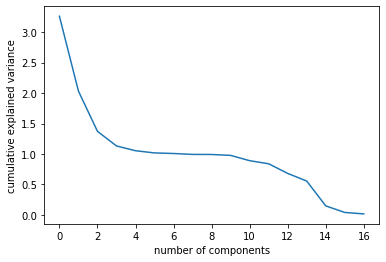

In [321]:
# n=3 looks good
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [322]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(df_train)
X_test = pca.transform(df_test)

In [323]:
pca.explained_variance_ratio_

array([0.19184425, 0.1195227 , 0.0806779 , 0.06656635])

## Multiple Regression Model

### Regression model with PCA components

In [324]:

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

#Then we initialize the object and fit the model on our data:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [325]:
y_train.shape

(250234,)

In [326]:
# print the R-squared value for the model
regressor.score(X_train,y_train)

0.17932471790926652

In [327]:
regressor.score(X_test,y_test)

0.17653410455016372

### Regression with original variables

In [364]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

#Then we initialize the object and fit the model on our data:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [372]:
# print the R-squared value for the model
regressor.score(X_train,y_train)

0.26188822643450294

In [373]:
regressor.score(X_test,y_test)

0.25392407122516825

## Polynomial Regression Model

In [386]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [387]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [389]:
regr1 = LinearRegression()
poly = PolynomialFeatures(degree = 3)
Xpoly = poly.fit_transform(X_train)
regr1.fit(Xpoly, y_train)
Xpolytest = poly.fit_transform(X_test)
result = regr1.predict(Xpolytest)
print('Mean squared error:', mean_squared_error(result,y_test))


Mean squared error: 689.0457747599261


In [392]:
print('R square:', r2_score(result,y_test))

R square: 0.6059760284321329


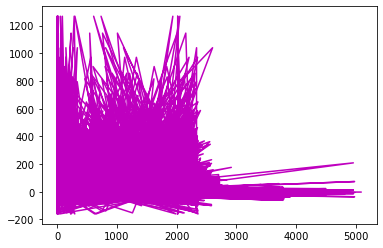

In [393]:
plt.plot(X_test, result, color='m')
plt.show()

## Random Forest Regressor Model

In [14]:
# import Random Forest regresssor since our target variable is continous

from sklearn.ensemble import RandomForestRegressor

In [15]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [400]:
# instantiate the classifier 

rfc = RandomForestRegressor(random_state=0)

In [401]:
# fit the model

rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [402]:
score = rfc.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.98738468214373


In [403]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [404]:
scoretest = rfc.score(X_test, y_test)
print("R-squared:", scoretest)   

R-squared: 0.8993215849173214


* Tuning with GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
rfregressor=RandomForestRegressor()

In [19]:
param_grid = {
   'n_estimators': [10, 100, 500],
   'max_features': [4,5,6,7],
   'max_depth' : [2,3,4,5,6],
   #'criterion' :['mse', 'mae']
}


In [20]:
GSCV = GridSearchCV(estimator=rfregressor, param_grid=param_grid, cv=3)
GSCV.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [4, 5, 6, 7],
                         'n_estimators': [10, 100, 500]})

In [21]:
GSCV.best_params_ 

{'max_depth': 6, 'max_features': 5, 'n_estimators': 10}

In [22]:
#using the best parameters
randmf = RandomForestRegressor(n_estimators = 500, max_features = 7, max_depth= 6) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(max_depth=6, max_features=7, n_estimators=500)

In [23]:
y_pred_randmf = randmf.predict( X_test )

In [24]:
score2 = randmf.score(X_train, y_train)
print("R-squared:", score2) 

R-squared: 0.6048985362404982


In [25]:
scoretest2 = randmf.score(X_test, y_test)
print("R-squared:", scoretest2)  

R-squared: 0.5811408356101335


## XGBoost Model

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np

In [27]:
X = data.drop('arr_delay', 1)
y = data['arr_delay']

C:\Users\Owner\AppData\Local\Temp/ipykernel_1404/1139672721.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('arr_delay', 1)


In [28]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [29]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
#instantiate an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 2, n_estimators = 100)

In [31]:
# fit and make predictions

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

[14:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test,y_pred)
print("RMSE: ", mse**(1/2))
#print("MAE: ", mae) 
scoretest = xg_reg.score(X_test, y_test)
print("R-squared:", scoretest)

RMSE:  22.780970967981293
R-squared: 0.794999024389839


### k-fold Cross Validation using XGBoost

In [35]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 6, 'alpha': 2}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,49.550981,0.301567,49.544582,1.190939
1,49.484187,0.286852,49.478151,1.215903
2,49.294073,0.261650,49.288470,1.270813
3,49.205782,0.207675,49.203552,1.308466
4,49.120181,0.246862,49.121070,1.282137


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))  #model improved a little bit when comparing previous model's rmse.

### Random Search for XGBost